In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
DIR = '/workspace/nflbigdatabowl2023'
sys.path.append(DIR)

In [3]:
from typing import List, Dict
from scipy.spatial import Voronoi
from shapely import Polygon
from nflpocketarea2023.metrics.pocket_area.base import PocketArea, PocketAreaMetadata

In [4]:
def voronoi_pocket_area(players: List[Dict]) -> PocketArea:

    passer_idx = -1
    passer_coord = (-1, -1)
    for i, p in enumerate(players):
        if p['role'] == 'passer':
            passer_idx = i
            passer_coord = (p['x'], p['y'])
            break
    
    points = [(p['x'], p['y']) for p in players]
    ghost = (passer_coord[0], passer_coord[1] - 2)
    points.append(ghost)

    vor = Voronoi(points)
    region_idx = vor.point_region[passer_idx]
    region_vertices_indices = vor.regions[region_idx]
    region_vertices = [tuple(vor.vertices[idx]) for idx in region_vertices_indices]

    pocket = Polygon(region_vertices)
    area = pocket.area
    metadata = PocketAreaMetadata(vertices=region_vertices)
    return PocketArea(area, metadata)

In [5]:
frame = [
  {'role': 'passer', 'x': 5, 'y': 5},
  {'role': 'rusher', 'x': 1, 'y': 9},
  {'role': 'rusher', 'x': 9, 'y': 9},
  {'role': 'blocker', 'x': 1, 'y': 1},
  {'role': 'blocker', 'x': 9, 'y': 1}
]

In [6]:
pocket_area = voronoi_pocket_area(frame)
print(pocket_area.area)
print(pocket_area.metadata.vertices)

23.0
[(8.0, 4.0), (9.0, 5.0), (5.0, 9.0), (1.0, 5.0), (2.0, 4.0)]


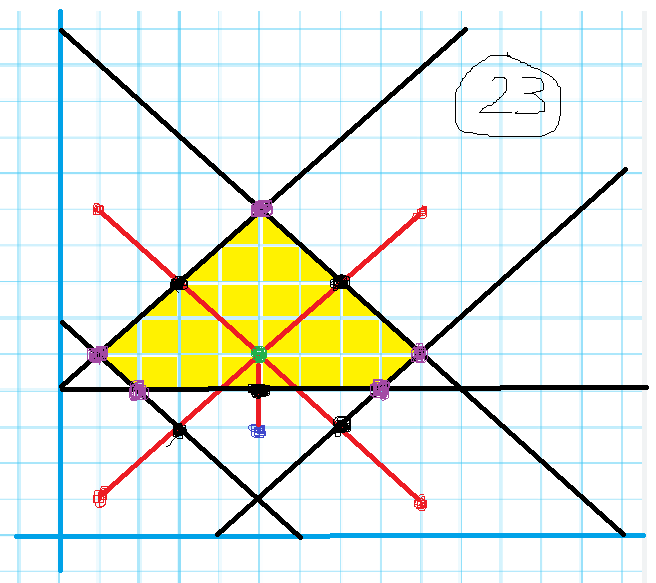